## Decision Tree Hyperparameters in sklearn

In [12]:
# #
# Classification and Regreession Tree 
# 在每个节点上根据每一个维度d 和每一个阈值 v 进行二分得到的二叉树
# slearn 默认使用的是CART 
# 当建立决策树时。在每个节点上都要进行二次划分。 预测O(logm) , 训练复杂度O(n*m*logm ) same with KNN 容易出现过拟合问题
# 非参数学习方法 - KNN and DT 
# 剪枝 可以减低模型复杂度和防止过拟合

# 超参数：
# 1. max_depth - 最大树深度
# 2. min_samples_leaf - 每个叶子节点上最少多少个样本才继续往下划分
# 3. min_samples_split - 每个节点上最少多少个样本才继续往下划分
# 4. max_leaf_nodes - 最大的叶子节点数

### Hyperparameters: max_depth/min_samples_leaf/min_samples_split/max_leaf_nodes

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from sklearn import datasets

X, y = datasets.make_moons(noise=0.20, random_state=200) # noise 比较大的情况下

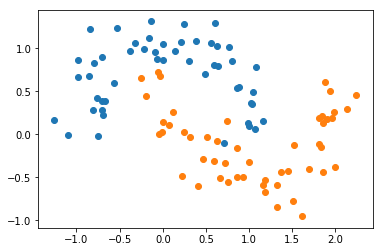

In [15]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier

# max_depth 不做限制
dt_clf = DecisionTreeClassifier()  #默认的是jini系数,max_step不做限制。这样会划分到每个决策点的jini系数为零为止。
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

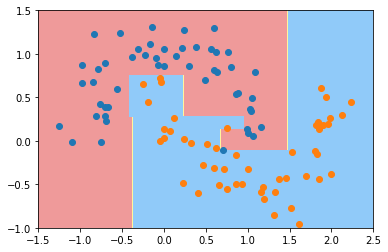

In [18]:
plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

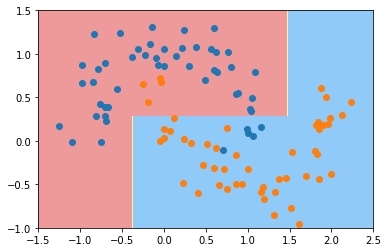

In [19]:
# 传入max_depth 超参数来限制过拟合情况-

dt_clf2 = DecisionTreeClassifier(max_depth=2)
dt_clf2.fit(X, y)

plot_decision_boundary(dt_clf2, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

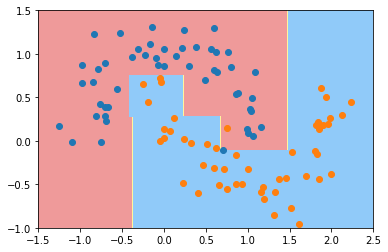

In [20]:
# 对于一个节点来数，要多少样本才继续对这几点拆分下去 - min_samples_split = 10
# 么有过拟合

dt_clf3 = DecisionTreeClassifier(min_samples_split=10)
dt_clf3.fit(X, y)

plot_decision_boundary(dt_clf3, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

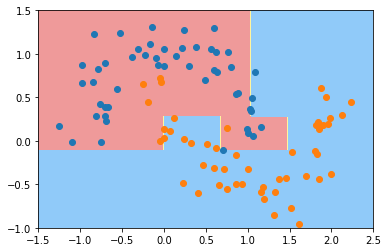

In [10]:
# min_samples_leaf 对于一个叶子节点说，至少要几个样本才能继续拆分
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=6)
dt_clf4.fit(X, y)

plot_decision_boundary(dt_clf4, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

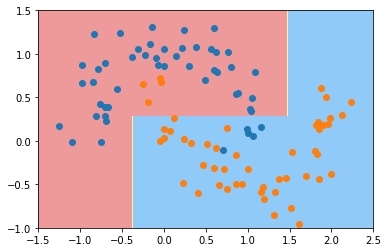

In [11]:
# 最多有几个叶子节点 max_leaf_nodes 

dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=5)
dt_clf5.fit(X, y)

plot_decision_boundary(dt_clf5, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()